In [27]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

In [2]:
full_data_path = "../data/02_intermediate/merged_data.csv"

In [3]:
full_data_df = pd.read_csv(full_data_path)
full_data_df

,origin,destination,departure_date,query_date,days_before_departure,airline,price,currency,stops,flight_duration,cabin,offer_rank,departure_time,arrival_time,source
0,CDG,AMS,2026-01-15,2026-01-03,12,Air France,117.0,EUR,1,495,ECONOMY,1,"9:20 AM on Thu, Jan 15","5:35 PM on Thu, Jan 15",google_flights
1,CDG,AMS,2026-01-15,2026-01-03,12,Norwegian,119.0,EUR,1,380,ECONOMY,2,"12:35 PM on Thu, Jan 15","6:55 PM on Thu, Jan 15",google_flights
2,CDG,AMS,2026-01-15,2026-01-03,12,Air France,125.0,EUR,1,375,ECONOMY,3,"9:20 AM on Thu, Jan 15","3:35 PM on Thu, Jan 15",google_flights
3,CDG,AMS,2026-01-15,2026-01-03,12,Air France,117.0,EUR,1,635,ECONOMY,4,"7:00 AM on Thu, Jan 15","5:35 PM on Thu, Jan 15",google_flights
4,CDG,AMS,2026-01-16,2026-01-03,13,Norwegian,127.0,EUR,1,305,ECONOMY,1,"12:30 PM on Fri, Jan 16","5:35 PM on Fri, Jan 16",google_flights
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91205,FCO,CDG,2026-05-31,2026-01-21,130,ITA,99.0,EUR,0,130,ECONOMY,1,"9:30 PM on Sun, May 31","11:40 PM on Sun, May 31",google_flights
91206,FCO,CDG,2026-05-31,2026-01-21,130,ITA,129.0,EUR,0,130,ECONOMY,2,"3:10 PM on Sun, May 31","5:20 PM on Sun, May 31",google_flights
91207,FCO,CDG,2026-05-31,2026-01-21,130,ITA,145.0,EUR,0,130,ECONOMY,3,"8:35 AM on Sun, May 31","10:45 AM on Sun, May 31",google_flights
91208,FCO,CDG,2026-05-31,2026-01-21,130,ITA,145.0,EUR,0,135,ECONOMY,4,"11:00 AM on Sun, May 31","1:15 PM on Sun, May 31",google_flights


In [4]:
full_data_df.columns

Index(['origin', 'destination', 'departure_date', 'query_date',
       'days_before_departure', 'airline', 'price', 'currency', 'stops',
       'flight_duration', 'cabin', 'offer_rank', 'departure_time',
       'arrival_time', 'source'],
      dtype='object')

In [14]:
full_data_df["price"].isna().any()

np.False_

In [5]:
full_data_df['query_date'] = pd.to_datetime(full_data_df['query_date'])
full_data_df['departure_date'] = pd.to_datetime(full_data_df['departure_date'])

In [6]:
unique_flights_def_columns = ["origin","destination", "departure_date","departure_time", "airline","flight_duration"]
grouped_data = full_data_df.groupby(unique_flights_def_columns)
len(grouped_data)

13905

In [7]:
fluctuating_prices = []
for group_key, group in grouped_data:
    origin, dest, dep_date, dep_time, airline,flight_duration = group_key
    group_sorted = group.sort_values('days_before_departure')
    is_changing = group_sorted["price"].nunique() > 1
    if len(group_sorted)>4 and is_changing: 
        fluctuating_prices.append(group_sorted)

In [8]:
len(fluctuating_prices)

5555

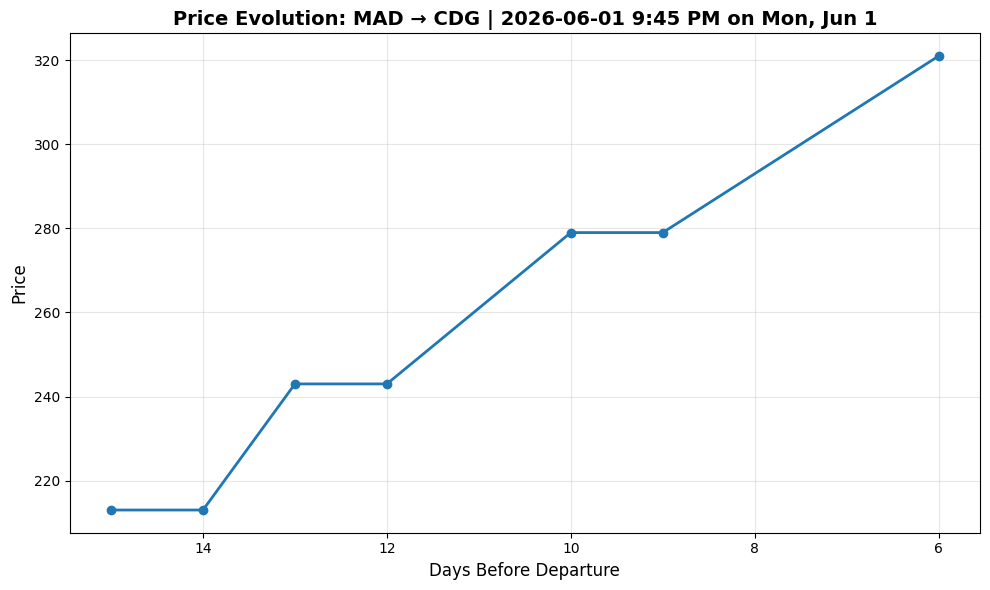

In [9]:
selected_idx = 5 
# Create a unique flight identifier for the dictionary key
flight_id = f"{origin}_{dest}_{dep_date.strftime('%Y-%m-%d')}_{dep_time.replace(':', '-').replace(' ', '_')}"

# Create figure for this flight
fig, ax = plt.subplots(figsize=(10, 6))

# Plot price vs days_before_departure
ax.plot(
    fluctuating_prices[selected_idx]['days_before_departure'], 
    fluctuating_prices[selected_idx]['price'],
    marker='o',
    linewidth=2,
    markersize=6
)

# Formatting
ax.set_xlabel('Days Before Departure', fontsize=12)
ax.set_ylabel('Price', fontsize=12)
ax.set_title(f'Price Evolution: {origin} → {dest} | {dep_date.strftime("%Y-%m-%d")} {dep_time}', 
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
# Reverse x-axis to show evolution from oldest to newest (approaching departure)
ax.invert_xaxis()

plt.tight_layout()
plt.show()

# Data distribution

In [39]:
target_col = "price"
target = full_data_df[target_col]

price_count = len(target)
avg_price = target.mean()
min_price = target.min()
max_price = target.max()
median_price = target.median()

Text(0.95, 0.95, 'Count: 91210\nAvg: 117.83\nMin: 37.0\nMax: 582.0\nMedian: 108.0')

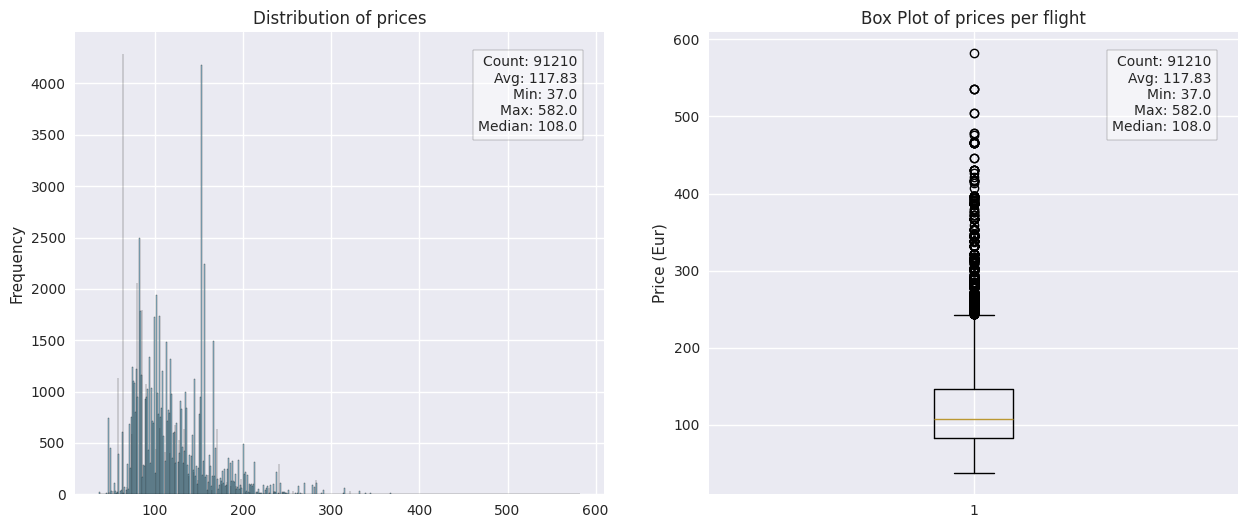

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].hist(target.values, bins=int(target.values.max()), alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of prices')
axes[0].set_ylabel('Frequency')
axes[0].text(0.95, 0.95, f'Count: {price_count}\nAvg: {avg_price:.2f}\nMin: {min_price}\nMax: {max_price}\nMedian: {median_price}',
                     verticalalignment='top', horizontalalignment='right',
                     transform=axes[0].transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

axes[1].boxplot(target)
axes[1].set_title('Box Plot of prices per flight')
axes[1].set_ylabel('Price (Eur)')
axes[1].text(0.95, 0.95, f'Count: {price_count}\nAvg: {avg_price:.2f}\nMin: {min_price}\nMax: {max_price}\nMedian: {median_price}',
                     verticalalignment='top', horizontalalignment='right',
                     transform=axes[1].transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

# Analyse trajectory distribution

In [53]:
od_freq = (
    full_data_df
    .groupby(["origin", "destination"])
    .size()
    .reset_index(name="count")
    .sort_values("count", ascending=False)
)
od_freq

,origin,destination,count
0,AMS,CDG,9121
1,ATH,CDG,9121
2,CDG,AMS,9121
3,CDG,ATH,9121
4,CDG,FCO,9121
5,CDG,LHR,9121
6,CDG,MAD,9121
7,FCO,CDG,9121
8,LHR,CDG,9121
9,MAD,CDG,9121


# Analyse airline companies

In [63]:
company_freq = (
    full_data_df
    .groupby(["airline"])
    .size()
    .reset_index(name="count")
    .sort_values("count", ascending=False)
)
company_freq

,airline,count
3,Air France,27529
5,British Airways,12694
11,Iberia,11135
10,ITA,9872
12,KLM,9401
0,Aegean,4984
22,Scandinavian Airlines,4633
20,SKY express,3389
26,Vueling,3224
21,SWISS,988


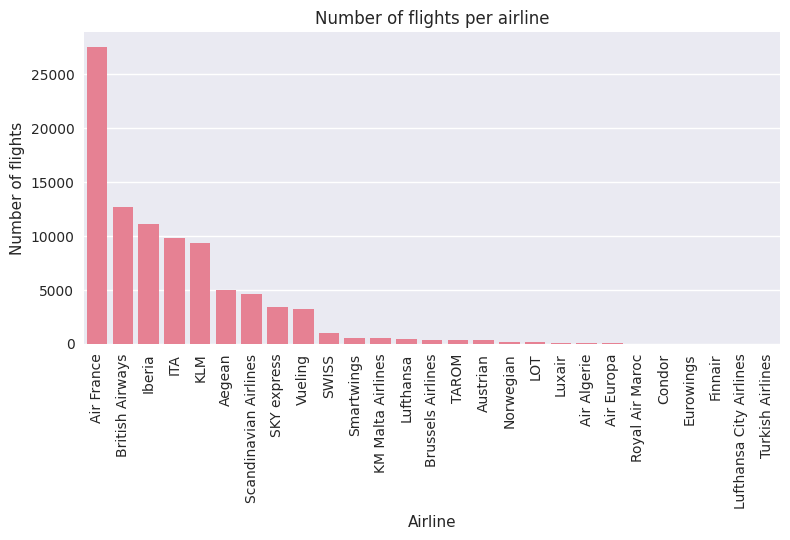

In [58]:
sns.barplot(
    data=company_freq,
    x="airline",
    y="count"
)

plt.xticks(rotation=90)
plt.xlabel("Airline")
plt.ylabel("Number of flights")
plt.title("Number of flights per airline")
plt.tight_layout()
plt.show()

In [64]:
company_mean_price = (
    full_data_df
    .groupby("airline", as_index=False)
    .agg(mean_price=("price", "mean"))
    .sort_values("mean_price", ascending=False)
)

company_mean_price

,airline,mean_price
25,Turkish Airlines,192.000000
9,Finnair,183.500000
16,Lufthansa City Airlines,178.333333
17,Luxair,166.432990
7,Condor,160.739130
15,Lufthansa,152.362525
14,LOT,151.614525
0,Aegean,148.942014
19,Royal Air Maroc,146.357143
18,Norwegian,142.823529


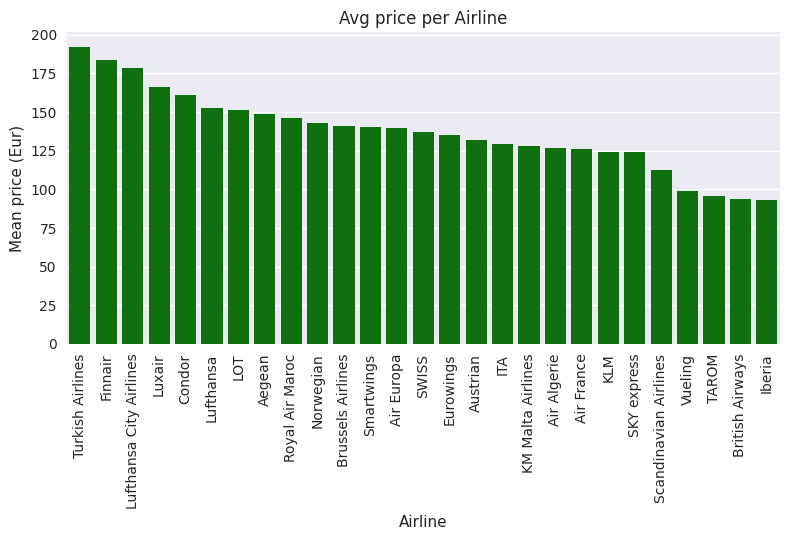

In [68]:
sns.barplot(
    data=company_mean_price,
    x="airline",
    y="mean_price",
    color="green"
)

plt.xticks(rotation=90)
plt.xlabel("Airline")
plt.ylabel("Mean price (Eur)")
plt.title("Avg price per Airline")
plt.tight_layout()
plt.show()